In [1]:
from easy_coloc import lib_easy_coloc
import xarray as xr
import pandas as pd
import cartopy as cart
import matplotlib.pylab as plt
from matplotlib import cm
import datetime
import cmocean
import numpy as np

In [2]:
%matplotlib inline

In [4]:
# load station information from csv file
df = pd.read_csv('../GLODAPv2.2019_COORDS.csv')
df['longitude']

0         0.03060
1         0.00530
2         0.00520
3         0.03230
4         0.01220
5         0.00690
6         0.00620
7         0.00050
8         0.00260
9         0.02700
10        0.00410
11       -0.00010
12       -0.00780
13        0.11690
14       -0.00840
15       -0.00580
16       -0.00050
17        0.00430
18       -0.00060
19        0.00320
20       -0.00880
21        0.00390
22       -0.00150
23       -0.00370
24       -0.00100
25       -0.00180
26       -0.00770
27        0.12910
28       -0.00520
29       -0.03290
           ...   
10182   -28.56840
10183   -27.93349
10184   -27.21398
10185   -26.47485
10186   -25.73321
10187   -25.35729
10188   -24.99189
10189   -24.25008
10190   -23.50030
10191   -22.88352
10192   -22.26717
10193   -21.64978
10194   -21.03379
10195   -20.41748
10196   -19.80046
10197   -19.18355
10198   -18.56688
10199   -17.95081
10200   -17.33351
10201   -16.71780
10202   -16.10080
10203   -15.48352
10204   -14.86894
10205   -14.25112
10206   -1

In [5]:
df = df.dropna()

In [6]:
df

Unnamed: 0     bearing  cruise         dx  latitude  longitude  month  \
0               0    0.000000    15.0   0.000000 -53.00800    0.03060    1.0   
1               1  178.251596    15.0  54.844928 -53.50100    0.00530    1.0   
2               2  179.993223    15.0  55.263879 -53.99800    0.00520    1.0   
3               3 -178.246834    15.0  57.181294 -54.51200    0.03230    1.0   
4               4  178.652229    15.0  54.500775 -55.00200    0.01220    2.0   
5               5  179.655321    15.0  55.487285 -55.50100    0.00690    2.0   
6               6  179.666518    15.0   7.561383 -55.56900    0.00620    2.0   
7               7  179.578260    15.0  48.148722 -56.00200    0.00050    2.0   
8               8 -179.865827    15.0  55.041642 -56.49700    0.00260    2.0   
9               9 -178.361315    15.0  51.727059 -56.96200    0.02700    2.0   
10             10  178.687374    15.0  59.727579 -57.49900    0.00410    2.0   
11             11  179.742864    15.0  55.153247 -57.99500   -0.00010    2.0   
12             12  179.541698    15.0  55.932863 -58.49800   -0.00780    2.0   
13             13 -173.897699    15.0  66.991981 -59.09700    0.11690    2.0   
14             14  171.055841    15.0  45.482445 -59.50100   -0.00840    2.0   
15             15 -179.850731    15.0  55.486460 -60.00000   -0.00580    2.0   
16             16 -179.700324    15.0  55.487039 -60.49900   -0.00050    2.0   
17             17 -179.732783    15.0  55.486881 -60.99800    0.00430    2.0   
18             18  179.732601    15.0  55.709275 -61.49900   -0.00060    2.0   
19             19 -179.795145    15.0  55.486629 -61.99800    0.00320    2.0   
20             20  179.363732    15.0  55.489747 -62.49700   -0.00880    2.0   
21             21 -179.344589    15.0  56.045973 -63.00100    0.00390    2.0   
22             22  179.721066    15.0  55.042152 -63.49600   -0.00150    2.0   
23             23  179.869615    15.0  47.257968 -63.92100   -0.00370    2.0   
24             24 -179.884566    15.0  64.159606 -64.49800   -0.00100    2.0   
25             25  179.961095    15.0  55.375086 -64.99600   -0.00180    2.0   
26             26  179.762355    15.0  65.383192 -65.58400   -0.00770    2.0   
27             27 -172.116498    15.0  45.133655 -65.98600    0.12910    2.0   
28             28  168.718030    15.0  30.734165 -66.25700   -0.00520    2.0   
29             29  177.136300    15.0  24.605078 -66.47800   -0.03290    2.0   
...           ...         ...     ...        ...       ...        ...    ...   
10180       10180  -89.730499  1109.0  64.148409  24.50024  -29.83353    1.0   
10181       10181  -89.888487  1109.0  64.114533  24.50004  -29.19988    1.0   
10182       10182  -89.862084  1109.0  63.894996  24.50011  -28.56840    1.0   
10183       10183  -89.913971  1109.0  64.242172  24.49965  -27.93349    1.0   
10184       10184  -89.573396  1109.0  72.802291  24.50282  -27.21398    1.0   
10185       10185  -90.058850  1109.0  74.786934  24.50033  -26.47485    1.0   
10186       10186  -89.811410  1109.0  75.041021  24.50074  -25.73321    1.0   
10187       10187  -90.295563  1109.0  38.037652  24.49851  -25.35729    1.0   
10188       10188  -89.708843  1109.0  36.972801  24.49976  -24.99189    1.0   
10189       10189  -89.969266  1109.0  75.059277  24.49831  -24.25008    1.0   
10190       10190  -89.719415  1109.0  75.865705  24.49980  -23.50030    1.0   
10191       10191  -69.486379  1109.0  66.522112  24.70819  -22.88352    1.0   
10192       10192  -69.411357  1109.0  66.396453  24.91691  -22.26717    1.0   
10193       10193  -69.368621  1109.0  66.413870  25.12609  -21.64978    1.0   
10194       10194  -69.372354  1109.0  66.148225  25.33439  -21.03379    1.0   
10195       10195  -69.359525  1109.0  66.073872  25.54257  -20.41748    1.0   
10196       10196  -69.298543  1109.0  66.060912  25.75129  -19.80046    1.0   
10197       10197  -69.179639  1109.0  65.984018  25.96091  -19.18355    1.0   
10198  

In [7]:
ddir = '/local/data/artemis/workspace/sridge/ocean/dissic_Omon_CanESM5_ssp126_r10i1p1f1_gn_201501-202012.nc'
ds = xr.open_dataset(f'{ddir}')

In [8]:
ds = ds.sel(time='2015-01-16')
ds.time

<xarray.DataArray 'time' (time: 1)>
array([cftime._cftime.DatetimeNoLeap(2015, 1, 16, 12, 0, 0, 0, 2, 16)],
      dtype=object)
Coordinates:
  * time     (time) object 2015-01-16 12:00:00
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time

In [9]:
ds = ds.rename({'latitude':'lat','longitude':'lon'})

In [10]:
# create source grid and target section objects
# this requires lon,lat from stations and the source grid dataset containing lon,lat
proj = lib_easy_coloc.projection(df['longitude'].values,df['latitude'].values,grid=ds,
                                 from_global=False)

In [13]:
# run the projection on the WOA analyzed temperature (t_an)
%time
fld = proj.run(ds['dissic'][:])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


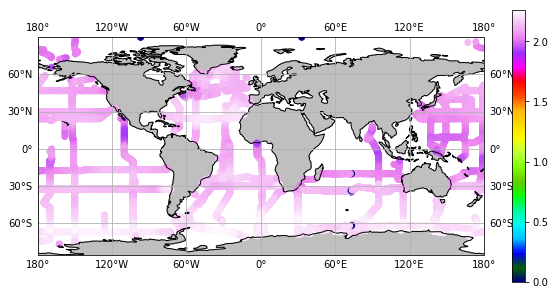

In [14]:
# plot surface data
plt.figure(figsize=[10,10])
m = plt.axes(projection=cart.crs.PlateCarree())
C = m.scatter(df['longitude'].values,df['latitude'].values,c=fld[0,0,:],cmap=cm.gist_ncar)
plt.colorbar(C,shrink=0.5)
m.coastlines()
m.add_feature(cart.feature.LAND, facecolor='0.75')
# m.set_extent([-75, -30, 30, 65], crs=cart.crs.PlateCarree())
gl = m.gridlines(draw_labels=True)